## Trabajo práctico

In [2]:
#Nuestros datos son al formato CSV : 
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
import imblearn

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
 
from collections import Counter



In [3]:
df = pd.read_csv("SDSS-DR14.csv")
df[:10]

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   
5  1.237650e+18  183.847174  0.173694  19.43133  18.46779  18.16451  18.01475   
6  1.237650e+18  183.864379  0.019201  19.38322  17.88995  17.10537  16.66393   
7  1.237650e+18  183.900081  0.187473  18.97993  17.84496  17.38022  17.20673   
8  1.237650e+18  183.924588  0.097246  17.90616  16.97172  16.67541  16.53776   
9  1.237650e+18  183.973498  0.081626  18.67249  17.71375  17.49362  17.28284   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   
5  18.04155  752    301       4    269  3.649550e+17    STAR  0.000315    324   
6  16.36955  752    301       4    269  3.232870e+17  GALAXY  0.100242    287   
7  17.07071  752    301       4    269  3.722370e+18    STAR  0.000315   3306   
8  16.47596  752    301       4    270  3.638290e+17    STAR  0.000089    323   
9  17.22644  752    301       4    270  3.243690e+17  GALAXY  0.040508    288   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512  
5  51666      594  
6  52023      559  
7  54922      515  
8  51615      595  
9  52000      400

Diré cada dato que me entrega la tabla.<br>
1) **Objid** = id <br>
2) **ra** = ascención recta en grados.<br>
3) **dec** = Declinación en grados.<br>
4) **u,g,ri,z** = Magnitud de los objetos en el SDSS<br>
5) **run** = Número del escaneo<br>
6) **rerun** tipo de procesamiento que se hace al escaneo<br>
7) **camcol** = Es la salida de una columna de cámara de ssd como parte de un run.<br>
8) **field** = Parte del camcol que es procesada por el photo pipeline<br>
9) **specobjid** = Identificación de 64 bits.<br>
10) **class** = Galaxy, QSO o star.<br>
11) **redshift** = Medida de la velocidad de recesión de una galaxia u otro objeto del cielo. <br>
12) **plate** = Cada exposición espectroscópica emplea una placa metálica circular grande, delgada, que coloca las fibras ópticas a través de agujeros perforados en las ubicaciones de las imágenes en el plano focal del telescopio.<br>
13) **mjd** = Fecha en que se tomo una muestra de datos de SDSS.<br>
14) **fiberid** = Cada objeto tiene asignado un ID de fibra correspondiente.

In [7]:
#comprobando valores nulos
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

<span style='background: salmon; color:white; font-size:32px;'> vemos que no se encuentran nulos. </span>

In [8]:
# cuantas informaciones hay 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [4]:
#cambio las letras por palabra, quedando estrella como 0, galaxia como 1, Quasar como 0
df["class"].replace({'STAR':0, 'GALAXY':1, 'QSO':2}, inplace=True)

In [7]:
"""Elimino estos datos por que considero que no son relevantes para la predicción,estos datos son
   objid = Que es simplemente el id del objeto.
   rerun = Es el procesamiento, que no es necesario para hacer una predicción.
   specobjid = otra identificación
   mjd = fecha en la que se tomo, la cual para mi no es relevante. 
   fiberid = otra identificación

"""
astronomia = df.drop(['objid','rerun','specobjid','mjd','fiberid'], 1)
astronomia.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   run  camcol  field  class  redshift  plate  
0  752       4    267      0 -0.000009   3306  
1  752       4    267      0 -0.000055    323  
2  752       4    268      1  0.123111    287  
3  752       4    269      0 -0.000111   3306  
4  752       4    269      0  0.000590   3306

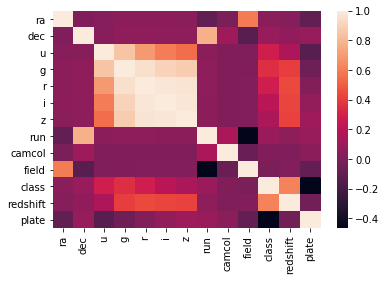

In [8]:
# mapa de calor para ver la correlación 
sb.heatmap(astronomia.corr())

<span style='background: salmon; color:white; font-size:32px; line-height:1.2;'>Al ver este mapa de calor se puede notar que hay una correlación entre run y field, por lo tanto podríamos quitar uno de estos dos, en este caso yo quitaría run, pero no lo haré ya que hice pruebas con el mismo y me arrojo valores de precisión aún menores con cuando este no estaba, haciendome ver que este valor si es relevante para la predicción de un astro. </span>

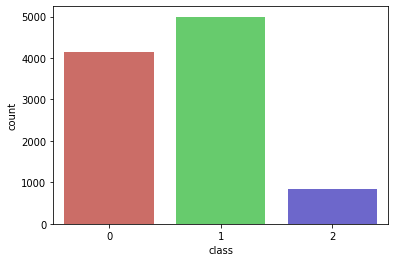

In [9]:
#Tenemos un problema, hay más datos de estrellas y galaxias, y muy pocos datos de Quasar.
sb.countplot(x='class',data=astronomia, palette='hls')

## Vamos a corroborar si efectivamente eso afecta a nuestros datos. 

In [10]:
#almacenamos los datos, en x tenemos las carácteristicas y la y será el elemento a predecir.
X = astronomia.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12]].values
y = astronomia.iloc[:,10].values # y contiene a class 

In [11]:
#Aquí muestro numéricamente que tan desbalanceada están las clases.
print(Counter(y))

Counter({1: 4998, 0: 4152, 2: 850})


In [12]:
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state = 25)

In [13]:
#balanceo del dataset de entrenamiento con la librería RandomOverSampler.
os = RandomOverSampler()
X_train_res, y_train_res = os.fit_sample(X_train, y_train)


In [14]:
#Como podemos ver que se ha balanceado los valores.
print(Counter(y_train_res))

Counter({0: 3790, 1: 3790, 2: 3790})


In [19]:
#Aplicamos el primer modelo, Regresión logistica.
LogReg = LogisticRegression(max_iter = 1000)
LogReg.fit(X_train_res, y_train_res)

C:\Users\cajap\Anaconda3\envs\proyecto\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

array([2, 1, 1, ..., 0, 1, 0], dtype=int64)

In [22]:
print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

coeficientes del modelo: [[ 2.02145503e-03 -1.60785892e-02  2.50205701e-01 -4.38562290e-01
  -2.79368203e-01  6.40522017e-02  3.32474128e-01  8.71002538e-04
  -1.94836431e-02  1.54453697e-03 -1.34635753e+00  6.93903001e-04]
 [ 2.86087205e-03 -1.19146999e-03  1.77341460e+00  3.54249444e-01
  -3.69607711e-01 -8.19629586e-01 -1.13549982e+00  8.05033647e-04
  -1.73378493e-02 -2.76575256e-05 -9.47237753e-01 -9.01166833e-04]
 [-4.88232708e-03  1.72700592e-02 -2.02362030e+00  8.43128461e-02
   6.48975914e-01  7.55577384e-01  8.03025690e-01 -1.67603618e-03
   3.68214924e-02 -1.51687945e-03  2.29359528e+00  2.07263832e-04]]
intercept: [ 0.06816618  0.07668518 -0.14485136]


In [20]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 916,  119,   56],
       [  88, 1112,    8],
       [   5,   11,  185]], dtype=int64)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1091
           1       0.90      0.92      0.91      1208
           2       0.74      0.92      0.82       201

    accuracy                           0.89      2500
   macro avg       0.85      0.89      0.87      2500
weighted avg       0.89      0.89      0.89      2500



Primero que nada debemos saber que es precisión y recall. <br/>
La **precisión** es la fracción de todas las instancias relevantes dividido entre las instancias obtenidas. <br>
La **recuperación** es la fracción de instancias relevantes que se han obtenido sobre la cantidad total de instancias relevantes<br>
1.-A partir de esto puedo decir que la **Clase 0** en este caso **estrella** tiene un 91% de decir que es estrella y de todas las estrellas que  habían en los datos reconocio un 84%.<br>
2.-La **Clase 1** en este caso **Galaxia** tiene un 90% de decir que es galaxia y de todas las galaxias que  habían en los datos reconocio un 92% de ellas.<br>
3.-La **Clase 2** en este caso **Quasar** tiene un 74% de decir que es Quasar y de todas los Quasar que  habían en los datos reconocio un 92%.<br>
Podemos ver gracias a los coeficientes del modelo que u y redshift son las variables más relevantes, u = -2.02362030e+00 y redshift = 2.29359528e+00.




Ahora bien veamos las ventajas de este método de predicción.<br>
Los resultaos ofrecidos son altamente interpretables, el peso de cada una de las características determina la importancia que tiene la decisión final en mi caso la predicción de si es estrella, galaxia o quasar.<br>
<strong>Desventaja del modelo</strong> <br>
- La variable objetivo ha de ser linealmente separable. En caso contrario el modelo de regresión logística no clasificará correctamente.<br> 
- Otra desventaja es la dependencia que muestra en las características. Ya que no es una herramienta útil para identificar las características más adecuadas.<br><br>
- Problemas con valores que se comportan de manera lineal, por eso se recomiendo en esos casos usar árboles de decisión. <br>
En aprendizaje automático hay clarificadores que pueden trabajar con múltiples clases, como los Árboles de Decisión o Random Forest. Por otro lado, existen otros que no, como la Regresión Logística. Pero siempre es posible utilizar trucos para utilizar la regresión logística en problemas de clasificación con múltiples clases, en nuestro caso se utiliza **uno contra todos**.<br>
    * En esta estrategia se ha de entrenar tantos clasificadores binarios como clases existan en el conjunto de datos. Cada uno de los modelos predice la probabilidad de que el registro pertenezca a una clase. A la hora de realizar una predicción se ejecutan todos los clasificadores y se selecciona aquel que ofrece mayor probabilidad.


    


In [24]:
#método Ordinary Least Squares (OLS) a partir de los datos de entrenamiento balanceado anteriormente.
import statsmodels.api as sm
est = sm.OLS(y_train_res, X_train_res).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              9945.
Date:                Fri, 29 May 2020   Prob (F-statistic):                        0.00
Time:                        22:12:49   Log-Likelihood:                         -5149.2
No. Observations:               11370   AIC:                                  1.032e+04
Df Residuals:                   11358   BIC:                                  1.041e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
#función para la variable y, retornando a partir de la multiplicación de coeficientes
def predict_ast(ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate):
    return  -9.23e-05 * ra + dec * 0.0008 + u * -0.7903 + g * 1.3688 + r *0.3644 + i*-0.0227 + z * -0.8635 + run * 0.0001 + camcol *0.0026 + field *-2.055e-05+ redshift * 0.5610 + plate*-9.29e-05

In [36]:
#valor para 1 
predict_ast(183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0.123111,287)

1.1599251068939012

In [37]:
#valor para la clase 0
predict_ast(183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,-0.000009,3306)

0.005500353010196912

In [38]:
#valor para la clase 2
predict_ast(184.350647,0.20723,18.73832,18.60962,18.39696,18.31174,17.97663,752,4,272,0.271937,287)



1.6183642572818997

**Interpretación de los resultados**
A partir de los pesos obtenidos podemos darnos cuenta que u,g,z y redshift son los que tienen mayor peso en nuestra función, entonces esto quiere decir que estos valores son los que aproximan más a la predicción de una estrella, una galaxia o un quasar.<br>
Como podemos ver en la predicción de la clase 1, utilizamos un valor existente en la tabla para predecir que efectivamente nos de 1, pero su valor fue 1.15 dando un error de 0.15.<br>
En el segundo caso pusimos otro valor que estaba en la tabla con clase 0, al hacerlo nos dio un valor de 0.005.<br>
Por último hice lo mismo para la clase 2, y me da como resultado 1.61.<br>
En conclusión podemos ver que este modelo aproxima bastante bien la clase 0 y 1, pero la clase 2 está muy alejada de su valor a encontrar, en este caso no sabría si clasificarlo en la clase 1 o 2, y como vimos antes en la regresión logística igual había problemas con la clase 2.

**Ventajas de la regresión lineal**
* Facil de entender y explicar, está enfocado en decisiones de negocios. 
* Rápido de modelar y útil cuando la relación a modelar no es compleja y no tiene mucha información (no es esté el caso).
* Menos propenso al sobreajuste (pero en esta situación se hizo con valores balanceados)

**Desventajas del modelo**
* No se puede modelar relaciones complejas.
* No se pueden capturar relaciones no lineales sin transformar la entrada, por lo que tienes que trabajar duro para que se ajuste a funciones no lineales.
* Puede sufrir con valores atípicos. 
* Dependemos de una función hecha por nosotros mismos.

In [39]:
#árbol de decisión
from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_res,y_train_res)

In [40]:
#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1082    7    2]
 [   2 1194   12]
 [   0   24  177]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1091
           1       0.97      0.99      0.98      1208
           2       0.93      0.88      0.90       201

    accuracy                           0.98      2500
   macro avg       0.97      0.95      0.96      2500
weighted avg       0.98      0.98      0.98      2500



**Interpretación de los resultados**
1.-A partir de esto puedo decir que la **Clase 0** en este caso **estrella** tiene un 100% de decir que es estrella y de todas las estrellas que  habían en los datos reconocio un 99% de ellas.<br>
2.-La **Clase 1** en este caso **Galaxia** tiene un 97% de decir que es galaxia y de todas las galaxias que  habían en los datos reconocio un 99% de ellas.<br>
3.-La **Clase 2** en este caso **Quasar** tiene un 93% de decir que es Quasar y de todas los Quasar que  habían en los datos reconocio un 88%.<br><br>

Aquí podemos ver que este método de predicción es mucho más exacto que los visto anteriormente.

**Ventajas del método**
* Muy fácil de interpretar y entender, más aún si lo tenemos de una manera gráfica.
* Rápido.
* Robusto al ruido y valores perdidos.
* Preciso.
* Excelente para aprender relaciones complejas, altamente no lineales. Por lo general, pueden lograr un rendimiento bastante alto, mejor que la regresión polinomial. 

**Desventaja del modelo**
* Los árboles complejos son difíciles de interpretar, en nuestro caso al tener 11 caracteristicas será más dificil de entender.
* Es posible la duplicación dentro del mismo subárbol.
* En ocasiones no es utilizado por ser un algoritmo tan sencillo y no tan poderoso para datos complejos.

In [41]:
from sklearn.externals.six import StringIO
import pydot #sudo apt install python3-pydot graphviz

dot_data = StringIO()

features=['ra','dec','u','g','r','i','z','run','camcol','field','redshift','plate']
classes=['0','1','2']
tree.export_graphviz(clf,out_file=dot_data,feature_names=features,class_names=classes, filled=True, 
                     rounded=True, impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png('modelo.png')

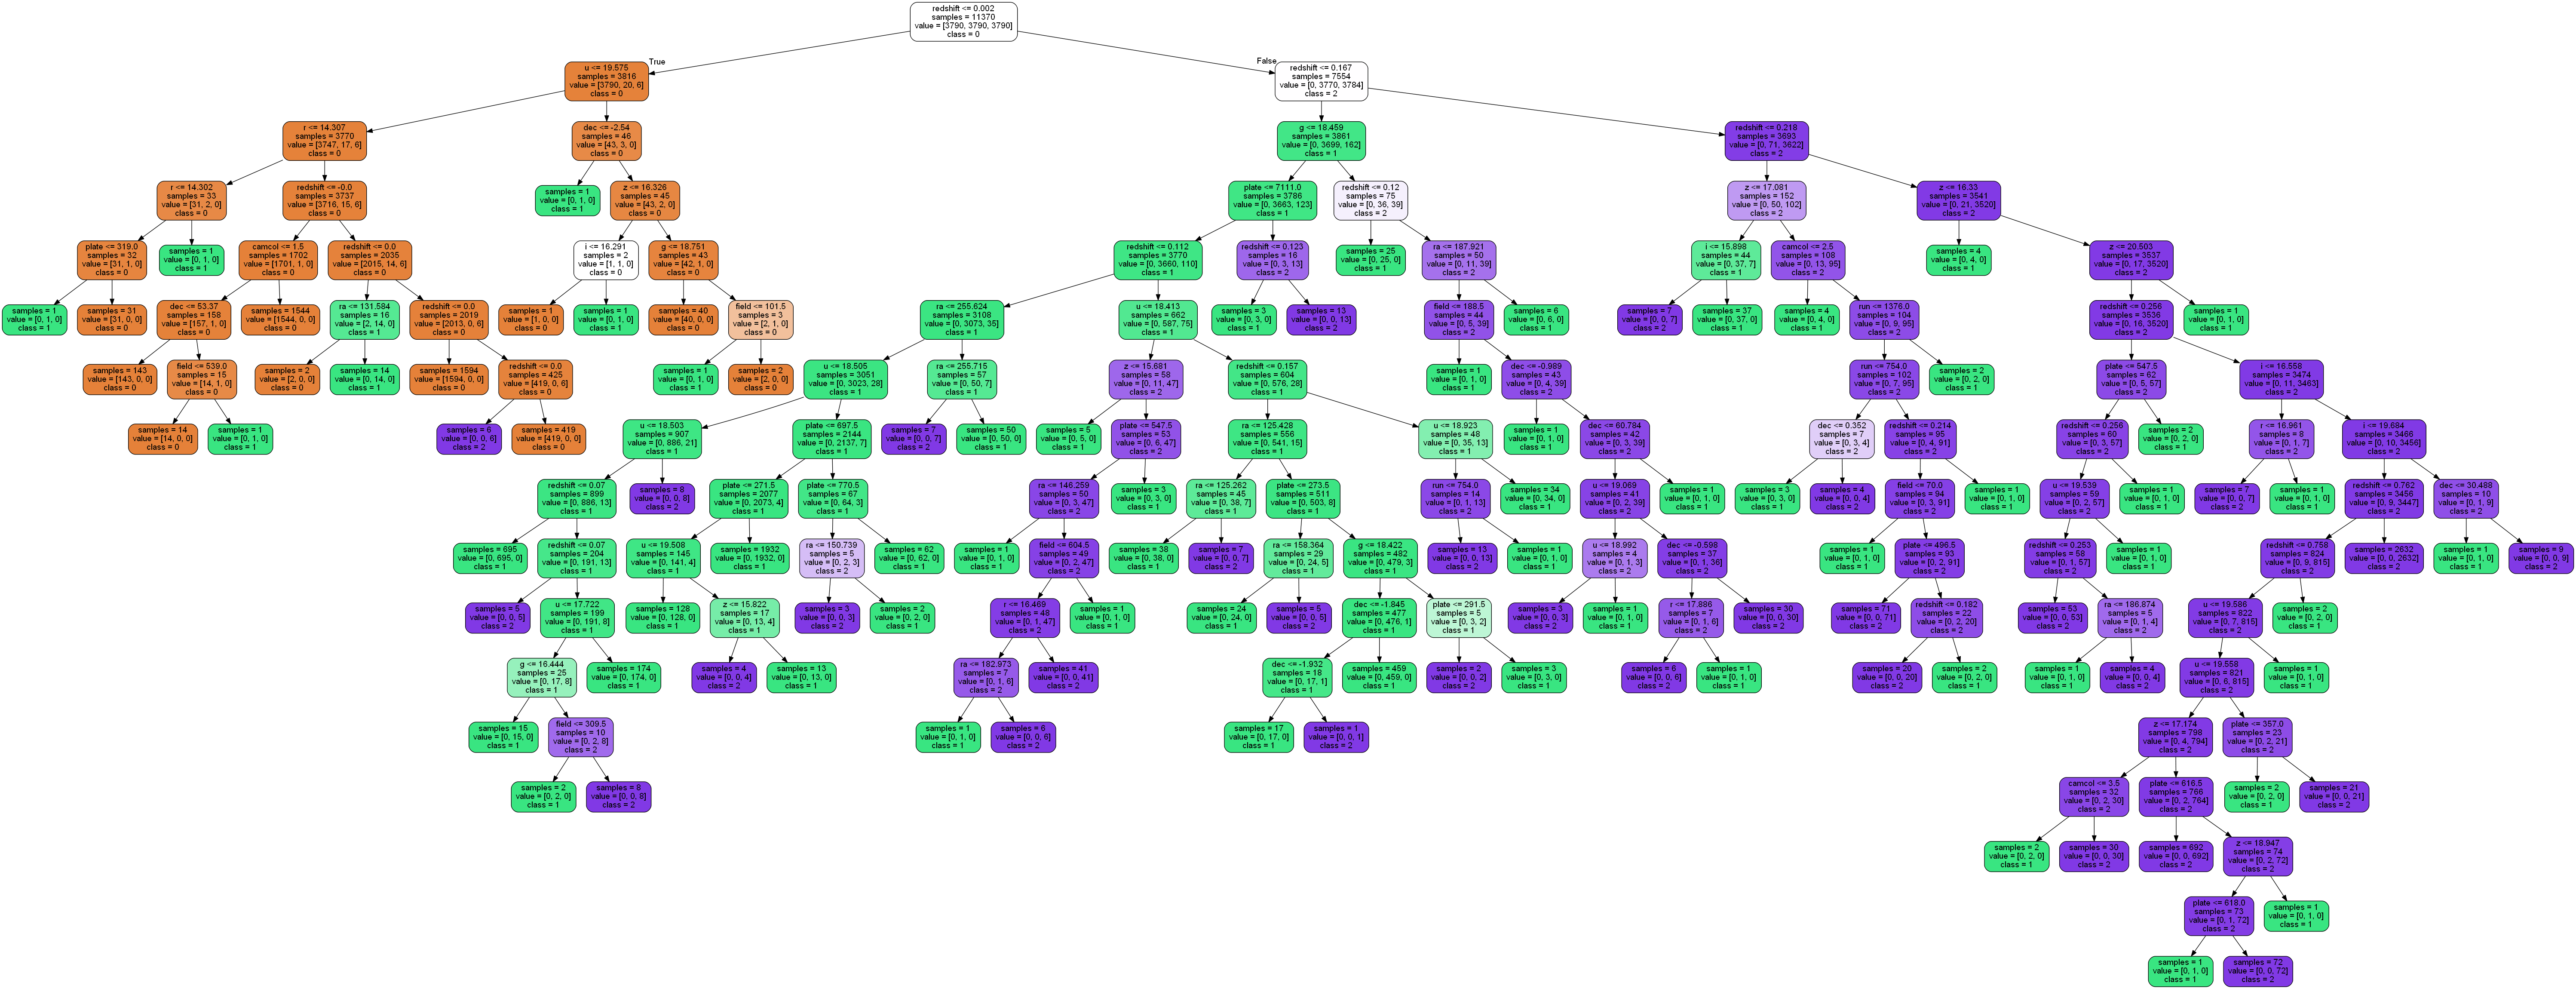

In [42]:
from IPython.display import Image
Image("modelo.png")

**Hablando sobre el árbol de decisión**
Nos podemos dar cuenta que a partir de la característica llamada redshift hace la pregunta si es menor o igual a 0.002 siendo esta la característica más importante del árbol de decisión, luego en la rama izquierda está la carácteristica u la cual hace la pregunta u<=19.975 a su izquierda va a r y a la derecha va a dec, entonces u y redshift en este caso tienen las características de mayor importancia.
En el caso de la derecha de redshift, se vuelve a preguntar si redshift es menora 0.167 y a la izquierda se va a g y a la derecha vuelve a redshift, dando a entender que efectivamente las caracteristicas más importantes en este modelo son redshift, g y u. 

**En conclusión**
Todos los modelos predictivos tenían en común que las características más importantes eran u y redshift, el único que salía de este criterío era la regresión lineal que es el peor prediciendo este tipo de problemática, ya que es complejo evaluar resultados tan distintos y también sufre de los valores extremos. 
La regresión logística estuvo mucho mejor prediciendo si las variables erán estrellas, quasar o galaxia, pero el que se llevo el primer lugar en este trabajo fue sin dudas el árbol de decisión teniendo una precisión y un recall inalcanzable por el resto de modelos. 